# Assignment 5.2: Neural-Network-7-Segment-Display

## Name : Uttam Mahata
## Enrollment No: 2022CSB104
## Date of Submission: Nov 06, 2024


### 1. Neural Network Architecture

This model is a **3-layer feedforward neural network**:
- **Input Layer**: 25 neurons (representing a 5x5 grid of features).
- **Hidden Layers**: Two hidden layers with 16 and 12 neurons, respectively.
- **Output Layer**: A single neuron for binary classification (0 or 1).

#### Forward Pass

In each layer, the forward pass calculates:
- **Weighted Sum**: The input to each neuron is computed as a weighted sum of the previous layer’s outputs plus a bias term.
    $$
    z = X \cdot W + b
    $$
  where:
  - $ X $: Inputs to the current layer.
  - $ W $: Weight matrix for the current layer.
  - $ b $: Bias vector for the current layer.

- **Activation Function**: The sigmoid activation function is applied to introduce non-linearity.
    $$
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $$

Each layer transforms its input, producing an output for the next layer until the output layer, where the sigmoid function’s output represents the probability of the positive class.

### 2. Loss Function (Mean Squared Error)

The model’s loss is calculated using **Mean Squared Error (MSE)**, which measures the average squared difference between actual ($ y $) and predicted ($ \hat{y} $) values:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
where $ n $ is the number of training examples.

### 3. Backpropagation and Weight Updates

Using backpropagation, we compute gradients for each layer’s weights and biases to minimize the loss function.

#### Gradient Calculation

1. **Output Layer**:
    - Error term for the output layer:
    $$
    \delta_{\text{output}} = (y - \hat{y}) \cdot \sigma'(\hat{y})
    $$
    where $ \sigma'(\hat{y}) = \hat{y} \cdot (1 - \hat{y}) $ is the derivative of the sigmoid function.

2. **Hidden Layers**:
    - For each hidden layer, we propagate the error backward, adjusting it by the weights and derivative of the activation function:
    $$
    \delta_{\text{hidden}} = \delta_{\text{output}} \cdot W^{T} \cdot \sigma'(z_{\text{hidden}})
    $$

#### Weight and Bias Updates

Weights and biases are updated using gradient descent:
$$
W = W + \alpha \cdot X^T \cdot \delta
$$
$$
b = b + \alpha \cdot \sum \delta
$$
where $ \alpha $ is the learning rate, controlling the step size of updates.

### 4. Evaluation Metrics

To evaluate the model, we use metrics derived from the **Confusion Matrix**:

#### Confusion Matrix Components
For binary classification, the confusion matrix consists of:
- **True Positives (TP)**: Correctly predicted positives.
- **False Positives (FP)**: Incorrectly predicted positives.
- **True Negatives (TN)**: Correctly predicted negatives.
- **False Negatives (FN)**: Incorrectly predicted negatives.

#### Metric Calculations

1. **Accuracy**: Measures the proportion of correct predictions.
    $$
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
    $$

2. **Precision**: Measures the proportion of true positives among predicted positives.
    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$

3. **Recall (Sensitivity)**: Measures the proportion of true positives among actual positives.
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$

4. **F1 Score**: Harmonic mean of precision and recall, balancing the two metrics.
    $$
    F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
    $$

5. **Specificity**: Measures the proportion of true negatives among actual negatives.
    $$
    \text{Specificity} = \frac{TN}{TN + FP}
    $$

### 5. k-Fold Cross-Validation

To improve the model's robustness and reduce overfitting, **k-fold cross-validation** is used. This technique splits the data into $ k $ folds:
1. For each fold, one subset is used as the test set, and the remaining $ k-1 $ folds are used as the training set.
2. The process is repeated $ k $ times, with each fold serving as the test set once.
3. The final metrics are averaged across all folds to give an overall performance estimate.





In [3]:
import pandas as pd
import random
import numpy as np


valid_patterns = {
'A': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
'B': [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
'C': [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
'D': [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
'E': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
'F': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
'G': [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
'H': [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
'I': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
'J': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0],
'K': [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
'L': [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
'M': [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
'N': [1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
'O': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
'P': [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
'Q': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
'R': [1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
'S': [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
'T': [1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
'U': [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0],
'V': [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
'W': [1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
'X': [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
'Y': [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
'Z': [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]

}


# Function to create variations by making small changes
def create_variations(pattern, num_variations=10):
    variations = [pattern]
    
    for _ in range(num_variations - 1):  # We already have the original pattern
        new_pattern = pattern.copy()
        change_type = random.choice(['flip', 'shift', 'rotate'])
        
        if change_type == 'flip':
            # Flip a random pixel (change 0 to 1 or 1 to 0)
            idx = random.randint(0, 24)
            new_pattern[idx] = 1 - new_pattern[idx]
        
        elif change_type == 'shift':
            # Shift a random row or column
            shift_type = random.choice(['row', 'col'])
            if shift_type == 'row':
                row = random.randint(0, 4)
                shift_direction = random.choice([-1, 1])  # shift left or right
                new_pattern[row*5:(row+1)*5] = np.roll(new_pattern[row*5:(row+1)*5], shift_direction)
            else:
                col = random.randint(0, 4)
                col_values = [new_pattern[i*5 + col] for i in range(5)]
                shift_direction = random.choice([-1, 1])  # shift up or down
                col_values = np.roll(col_values, shift_direction)
                for i in range(5):
                    new_pattern[i*5 + col] = col_values[i]
        
        elif change_type == 'rotate':
            # Rotate the grid slightly (90 degrees)
            new_pattern = np.array(new_pattern).reshape(5, 5)
            new_pattern = np.rot90(new_pattern)  # Rotate 90 degrees
            new_pattern = new_pattern.flatten()
        
        variations.append(new_pattern)
    
    return variations

# Create variations for each valid letter pattern
patterns = []
for letter, pattern in valid_patterns.items():
    variations = create_variations(pattern, num_variations=5)  # Create 5 variations for each letter
    patterns.extend(variations)

# Define labels for the letters A-Z (mapped to 1 for valid patterns)
valid_labels = [1] * len(patterns)

# Generate 100 unique invalid patterns (patterns that do not correspond to any valid letter)
valid_patterns_set = {tuple(pattern) for pattern in valid_patterns.values()}
invalid_patterns = []
while len(invalid_patterns) < 100:
    pattern = tuple(random.choices([0, 1], k=25))  # 5x5 grid flattened to 25 elements
    if pattern not in valid_patterns_set:
        invalid_patterns.append(list(pattern))

# Invalid labels (0 for invalid patterns)
invalid_labels = [0] * len(invalid_patterns)

# Combine valid patterns (with variations) and invalid patterns with labels
all_patterns = patterns + invalid_patterns
all_labels = valid_labels + invalid_labels

# Create a DataFrame
df = pd.DataFrame(all_patterns, columns=[f'Pixel_{i+1}' for i in range(25)])  # 5x5 grid flattened to 25 pixels
df['label'] = all_labels

# Shuffle the dataset to avoid bias in ordering
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the df to a CSV file
df.to_csv("balanced_alphabet_df_with_variations.csv", index=False)
print("Balanced and shuffled df with variations saved as 'balanced_alphabet_df_with_variations.csv'")


Balanced and shuffled df with variations saved as 'balanced_alphabet_df_with_variations.csv'


In [5]:
dataset = pd.read_csv('balanced_alphabet_df_with_variations.csv')


In [12]:
dataset.head()

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,label
0,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,1,0
1,1,0,0,0,1,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,1
2,1,1,1,1,0,1,0,0,0,1,...,0,0,0,1,1,1,1,1,0,1
3,1,0,1,0,1,1,1,1,0,0,...,1,1,0,1,0,0,0,1,0,0
4,1,1,1,1,0,1,0,0,0,1,...,0,0,0,1,1,1,1,1,0,1


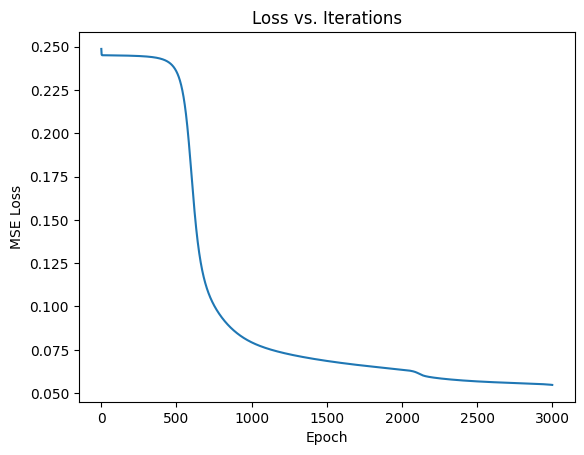

Accuracy: 0.9347826086956522
Precision: 0.9230769230769231
Recall: 0.96
F1 Score: 0.9411764705882353
Specificity: 0.9047619047619048


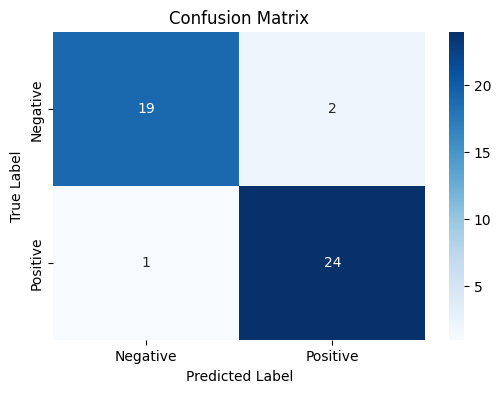

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prepare the dataset
X = dataset.drop(columns=["label"]).values  # Input features (5x5 grid)
y = dataset["label"].values  # Target labels (1 if A-Z, else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Parameters
input_size = 25  # 5x5 grid flattened
hidden_layer_1_size = 10
hidden_layer_2_size = 10
output_size = 1
learning_rate = 0.01
epochs = 3000

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden1 = np.random.randn(input_size, hidden_layer_1_size) * 0.1
bias_hidden1 = np.zeros(hidden_layer_1_size)
weights_hidden1_hidden2 = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) * 0.1
bias_hidden2 = np.zeros(hidden_layer_2_size)
weights_hidden2_output = np.random.randn(hidden_layer_2_size, output_size) * 0.1
bias_output = np.zeros(output_size)

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training process with backpropagation
loss_history = []
for epoch in range(epochs):
    # Forward pass
    hidden1_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
    hidden1_output = sigmoid(hidden1_input)
    
    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_output = sigmoid(hidden2_input)
    
    final_input = np.dot(hidden2_output, weights_hidden2_output) + bias_output
    final_output = sigmoid(final_input)
    
    # Calculate Mean Squared Error (MSE) loss
    loss = np.mean((y_train - final_output.flatten()) ** 2)
    loss_history.append(loss)
    
    # Backward pass with corrected shapes
    error = y_train - final_output.flatten()
    d_output = error[:, np.newaxis] * sigmoid_derivative(final_output)

    error_hidden2 = d_output.dot(weights_hidden2_output.T)
    d_hidden2 = error_hidden2 * sigmoid_derivative(hidden2_output)

    error_hidden1 = d_hidden2.dot(weights_hidden1_hidden2.T)
    d_hidden1 = error_hidden1 * sigmoid_derivative(hidden1_output)
    
    # Update weights and biases
    weights_hidden2_output += learning_rate * hidden2_output.T.dot(d_output)
    bias_output += learning_rate * np.sum(d_output, axis=0)

    weights_hidden1_hidden2 += learning_rate * hidden1_output.T.dot(d_hidden2)
    bias_hidden2 += learning_rate * np.sum(d_hidden2, axis=0)

    weights_input_hidden1 += learning_rate * X_train.T.dot(d_hidden1)
    bias_hidden1 += learning_rate * np.sum(d_hidden1, axis=0)

# Plot loss history to observe convergence
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss vs. Iterations')
plt.show()

# Test the model
hidden1_input = np.dot(X_test, weights_input_hidden1) + bias_hidden1
hidden1_output = sigmoid(hidden1_input)

hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
hidden2_output = sigmoid(hidden2_input)

final_input = np.dot(hidden2_output, weights_hidden2_output) + bias_output
final_output = sigmoid(final_input).flatten()

# Apply threshold of 0.7 to get binary predictions
y_pred = (final_output >= 0.7).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Specificity: {specificity}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


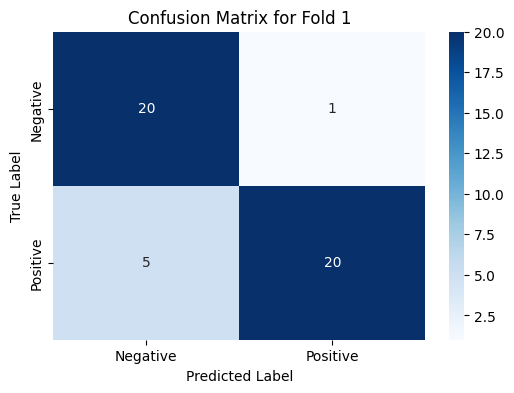

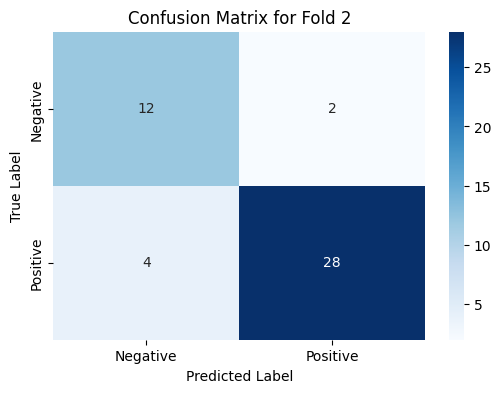

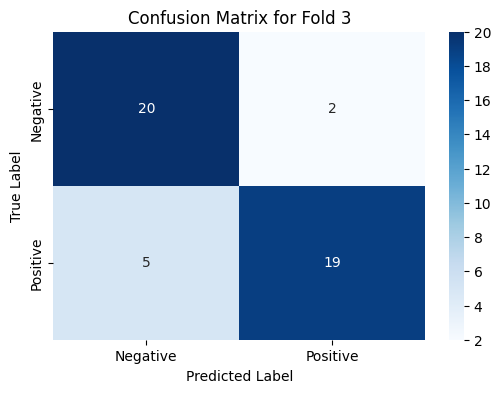

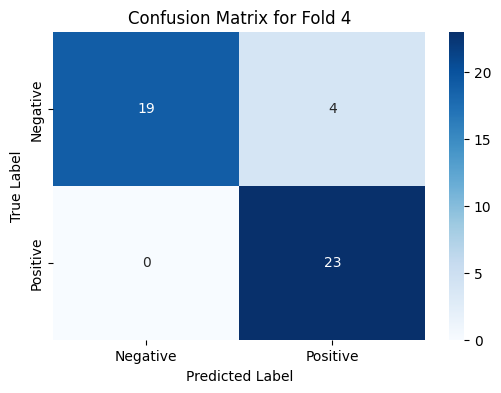

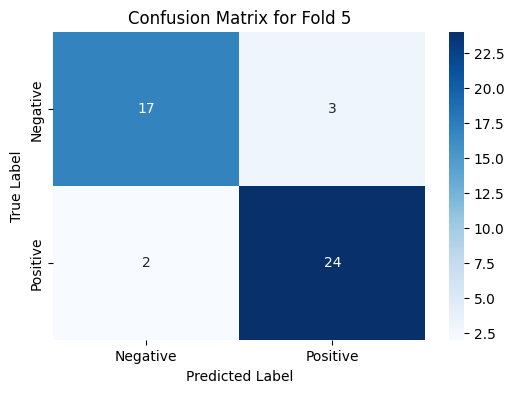

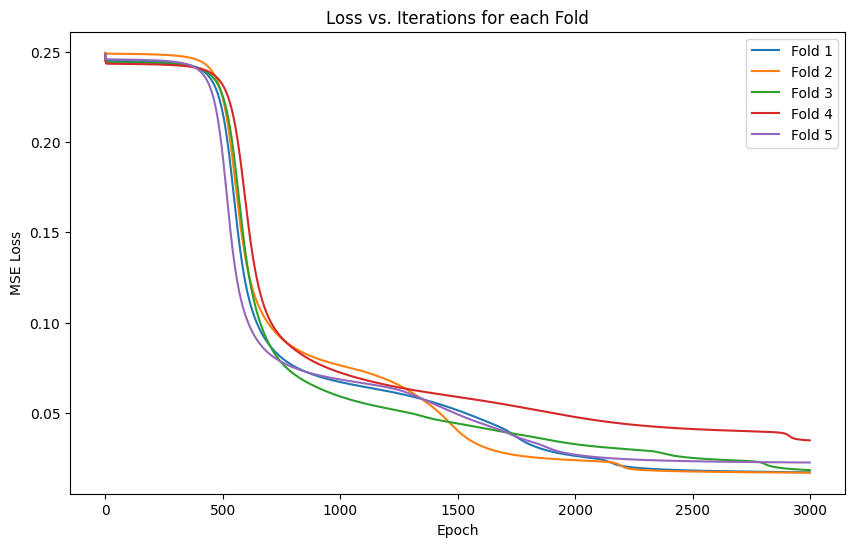

Average Accuracy: 0.8782608695652174
Average Precision: 0.9062433862433863
Average Recall: 0.877948717948718
Average F1 Score: 0.8885791691291705
Average Specificity: 0.8789403350272915


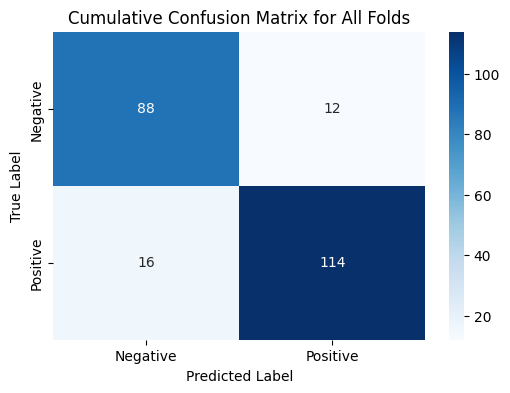

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold

# Neural Network Parameters
input_size = 25  # 5x5 grid flattened
hidden_layer_1_size = 10
hidden_layer_2_size = 10
output_size = 1
learning_rate = 0.01
epochs = 3000
k = 5  # Number of folds for k-fold cross-validation

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Prepare the dataset
X = dataset.drop(columns=["label"]).values  # Input features (5x5 grid)
y = dataset["label"].values  # Target labels (1 if A-Z, else 0)

# Initialize k-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Metrics storage for each fold
accuracy_scores, precision_scores, recall_scores, f1_scores, specificity_scores = [], [], [], [], []
fold_loss_history = []
cumulative_conf_matrix = np.array([[0, 0], [0, 0]])

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split data into train and test for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize weights and biases
    np.random.seed(42)
    weights_input_hidden1 = np.random.randn(input_size, hidden_layer_1_size) * 0.1
    bias_hidden1 = np.zeros(hidden_layer_1_size)
    weights_hidden1_hidden2 = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) * 0.1
    bias_hidden2 = np.zeros(hidden_layer_2_size)
    weights_hidden2_output = np.random.randn(hidden_layer_2_size, output_size) * 0.1
    bias_output = np.zeros(output_size)

    # Training process with backpropagation
    loss_history = []
    for epoch in range(epochs):
        # Forward pass
        hidden1_input = np.dot(X_train, weights_input_hidden1) + bias_hidden1
        hidden1_output = sigmoid(hidden1_input)

        hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
        hidden2_output = sigmoid(hidden2_input)

        final_input = np.dot(hidden2_output, weights_hidden2_output) + bias_output
        final_output = sigmoid(final_input)

        # Calculate Mean Squared Error (MSE) loss
        loss = np.mean((y_train - final_output.flatten()) ** 2)
        loss_history.append(loss)

        # Backward pass with corrected shapes
        error = y_train - final_output.flatten()
        d_output = error[:, np.newaxis] * sigmoid_derivative(final_output)

        error_hidden2 = d_output.dot(weights_hidden2_output.T)
        d_hidden2 = error_hidden2 * sigmoid_derivative(hidden2_output)

        error_hidden1 = d_hidden2.dot(weights_hidden1_hidden2.T)
        d_hidden1 = error_hidden1 * sigmoid_derivative(hidden1_output)

        # Update weights and biases
        weights_hidden2_output += learning_rate * hidden2_output.T.dot(d_output)
        bias_output += learning_rate * np.sum(d_output, axis=0)

        weights_hidden1_hidden2 += learning_rate * hidden1_output.T.dot(d_hidden2)
        bias_hidden2 += learning_rate * np.sum(d_hidden2, axis=0)

        weights_input_hidden1 += learning_rate * X_train.T.dot(d_hidden1)
        bias_hidden1 += learning_rate * np.sum(d_hidden1, axis=0)

    # Save loss history for this fold
    fold_loss_history.append(loss_history)

    # Test the model on this fold
    hidden1_input = np.dot(X_test, weights_input_hidden1) + bias_hidden1
    hidden1_output = sigmoid(hidden1_input)

    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_output = sigmoid(hidden2_input)

    final_input = np.dot(hidden2_output, weights_hidden2_output) + bias_output
    final_output = sigmoid(final_input).flatten()

    # Apply threshold of 0.8 to get binary predictions
    y_pred = (final_output >= 0.8).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_scores.append(tn / (tn + fp))

    # Update cumulative confusion matrix
    fold_conf_matrix = confusion_matrix(y_test, y_pred)
    cumulative_conf_matrix += fold_conf_matrix

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(fold_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Plot loss history for each fold
plt.figure(figsize=(10, 6))
for i, loss in enumerate(fold_loss_history):
    plt.plot(loss, label=f'Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss vs. Iterations for each Fold')
plt.legend()
plt.show()

# Report average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average F1 Score: {np.mean(f1_scores)}")
print(f"Average Specificity: {np.mean(specificity_scores)}")

# Plot cumulative confusion matrix for all folds
plt.figure(figsize=(6, 4))
sns.heatmap(cumulative_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Cumulative Confusion Matrix for All Folds')
plt.show()
